<a href="https://colab.research.google.com/github/BrunoMian/site/blob/master/Devagar_pra_eu_entender_rede_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Arquitetura e Implementação**

Começamos chamando a biblioteca ¨tensorflow¨ e dando o apelido de ¨tf¨

In [ ]:
import tensorflow as tf

Em seguida usamos a função ¨Sequential¨ para criar um modelo de rede neural chamado ¨rede¨

In [ ]:
rede = tf.keras.models.Sequential()

Por ultimo usamos a função ¨add¨ para adicionar camadas na nossa rede,
cada camada é do tipo ¨Dense¨ e recebe os parametros descritos no video

In [ ]:
rede.add(tf.keras.layers.Dense(units=10,input_shape=(4,),activation='sigmoid'))
rede.add(tf.keras.layers.Dense(units=16,activation='sigmoid'))
rede.add(tf.keras.layers.Dense(units=3,activation='softmax'))

**Aprendizado de Redes Neurais**




In [ ]:
rede.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics='accuracy')

**Treinamento, Resultados e Validação**



In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [ ]:
banco = load_iris()
banco.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
banco['data'][37]

array([4.9, 3.6, 1.4, 0.1])

In [ ]:
banco['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
X = banco['data']
y = banco['target']

X_train, X_test, y_train , y_test = train_test_split(X,y, test_size = 0.2)

Como a train_test_split separa de forma aleatória, o resultado na prova pode variar, mas nos nossos testes ficou entre 0.15 e 0.40

In [ ]:
rede.evaluate(X_test,y_test)

1/1 [==============================] - 0s 2ms/step - loss: 1.1694 - accuracy: 0.3667


[1.169405460357666, 0.36666667461395264]

Como o ponto de partida são pesos aleatórios e a separação do train_test_split também, o resultado da rede pode ser diferente. A acuracia ficou acima de 80% em todos os nossos testes.

In [ ]:
r = rede.fit(X_train, y_train, epochs=150 ,validation_data=(X_test,y_test))

Epoch 1/150
4/4 [==============================] - 0s 12ms/step - loss: 1.2030 - accuracy: 0.3250 - val_loss: 1.1511 - val_accuracy: 0.3667
Epoch 2/150
4/4 [==============================] - 0s 7ms/step - loss: 1.1808 - accuracy: 0.3250 - val_loss: 1.1362 - val_accuracy: 0.3667
Epoch 3/150
4/4 [==============================] - 0s 6ms/step - loss: 1.1639 - accuracy: 0.3250 - val_loss: 1.1225 - val_accuracy: 0.3667
Epoch 4/150
4/4 [==============================] - 0s 6ms/step - loss: 1.1443 - accuracy: 0.3250 - val_loss: 1.1115 - val_accuracy: 0.3667
Epoch 5/150
4/4 [==============================] - 0s 5ms/step - loss: 1.1311 - accuracy: 0.3250 - val_loss: 1.1020 - val_accuracy: 0.3667
Epoch 6/150
4/4 [==============================] - 0s 5ms/step - loss: 1.1204 - accuracy: 0.3250 - val_loss: 1.0942 - val_accuracy: 0.3667
Epoch 7/150
4/4 [==============================] - 0s 5ms/step - loss: 1.1097 - accuracy: 0.3250 - val_loss: 1.0880 - val_accuracy: 0.3667
Epoch 8/150
4/4 [=========

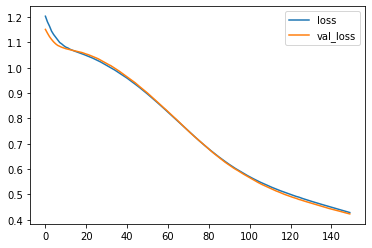

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

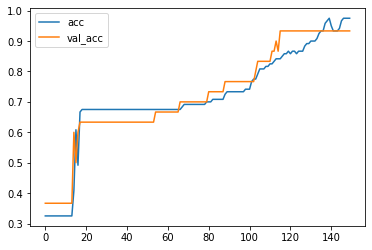

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
import numpy as np
rede.predict(np.array([[5.4, 2.5, 3.7, 1.0]]))

array([[0.19455257, 0.5391741 , 0.26627344]], dtype=float32)